In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('../data/01_raw/train.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [5]:
df.describe()
# df.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [6]:
# churn, international_plan, voice_mail_plan -> yes: 1, no: 0 변환
df['churn'] = (df['churn'] == 'yes').astype(int)
df['international_plan'] = (df['international_plan'] == 'yes').astype(int)
df['voice_mail_plan'] = (df['voice_mail_plan'] == 'yes').astype(int)
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,NJ,137,area_code_415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,OH,84,area_code_408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,OK,75,area_code_415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,MA,121,area_code_510,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


In [39]:
# 결측치 확인
df.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [40]:
# 중복치 확인
df.duplicated().sum()

np.int64(0)

In [41]:
from sklearn.model_selection import train_test_split
from catboost import Pool, CatBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report

# 데이터 분할
# df.head()
X = df.drop('churn', axis=1)
y = df['churn']
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y)


# 데이터 풀 작업
cat_features = X.select_dtypes(include='object').columns.tolist()
train_pool = Pool(X_train, y_train, cat_features=cat_features)
test_pool = Pool(X_test, y_test, cat_features=cat_features)

# 모델 학습
model = CatBoostClassifier(
    iterations=500,   # 반복횟수
    learning_rate=0.01,
    eval_metric='Accuracy',
    verbose=100
)
    
model.fit(train_pool, eval_set=test_pool)

# 모델 평가
print(f'학습 Acc: {model.score(X_train, y_train)}')
print(f'평가 Acc: {model.score(X_test, y_test)}')
print(confusion_matrix(y_test, model.predict(X_test)))
print(classification_report(y_test, model.predict(X_test)))


(4250, 19) (4250,)
0:	learn: 0.8980232	test: 0.9031044	best: 0.9031044 (0)	total: 31.9ms	remaining: 15.9s
100:	learn: 0.9331660	test: 0.9200376	best: 0.9200376 (99)	total: 5.74s	remaining: 22.7s
200:	learn: 0.9576404	test: 0.9454374	best: 0.9463782 (162)	total: 12.1s	remaining: 17.9s
300:	learn: 0.9679950	test: 0.9482596	best: 0.9482596 (286)	total: 17.8s	remaining: 11.8s
400:	learn: 0.9739567	test: 0.9510818	best: 0.9510818 (383)	total: 24.2s	remaining: 5.97s
499:	learn: 0.9755256	test: 0.9520226	best: 0.9529633 (475)	total: 30.3s	remaining: 0us

bestTest = 0.9529633114
bestIteration = 475

Shrink model to first 476 iterations.
학습 Acc: 0.9748980232193285
평가 Acc: 0.9529633113828786
[[909   5]
 [ 45 104]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       914
           1       0.95      0.70      0.81       149

    accuracy                           0.95      1063
   macro avg       0.95      0.85      0.89      1063
weighted avg  

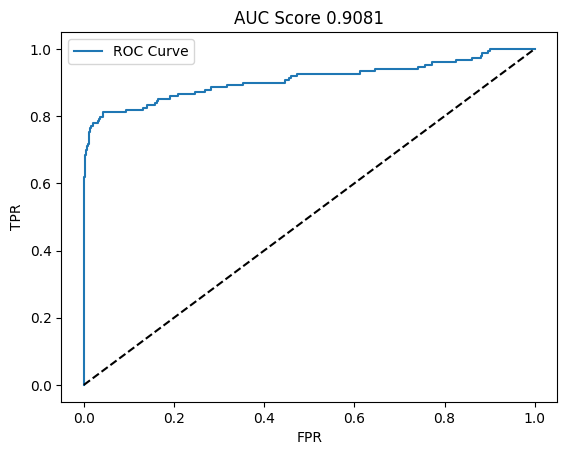

In [42]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1:]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.title(f'AUC Score {roc_auc_score(y_test, y_pred_proba):.4f}')
plt.show()


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   int64  
 4   voice_mail_plan                4250 non-null   int64  
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [7]:
df.describe()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,0.093176,0.261647,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059,0.140706
std,39.698401,0.290714,0.439583,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434,0.347759
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,0.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000,0.000000
50%,100.000000,0.000000,0.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,0.000000,1.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000,0.000000
max,243.000000,1.000000,1.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


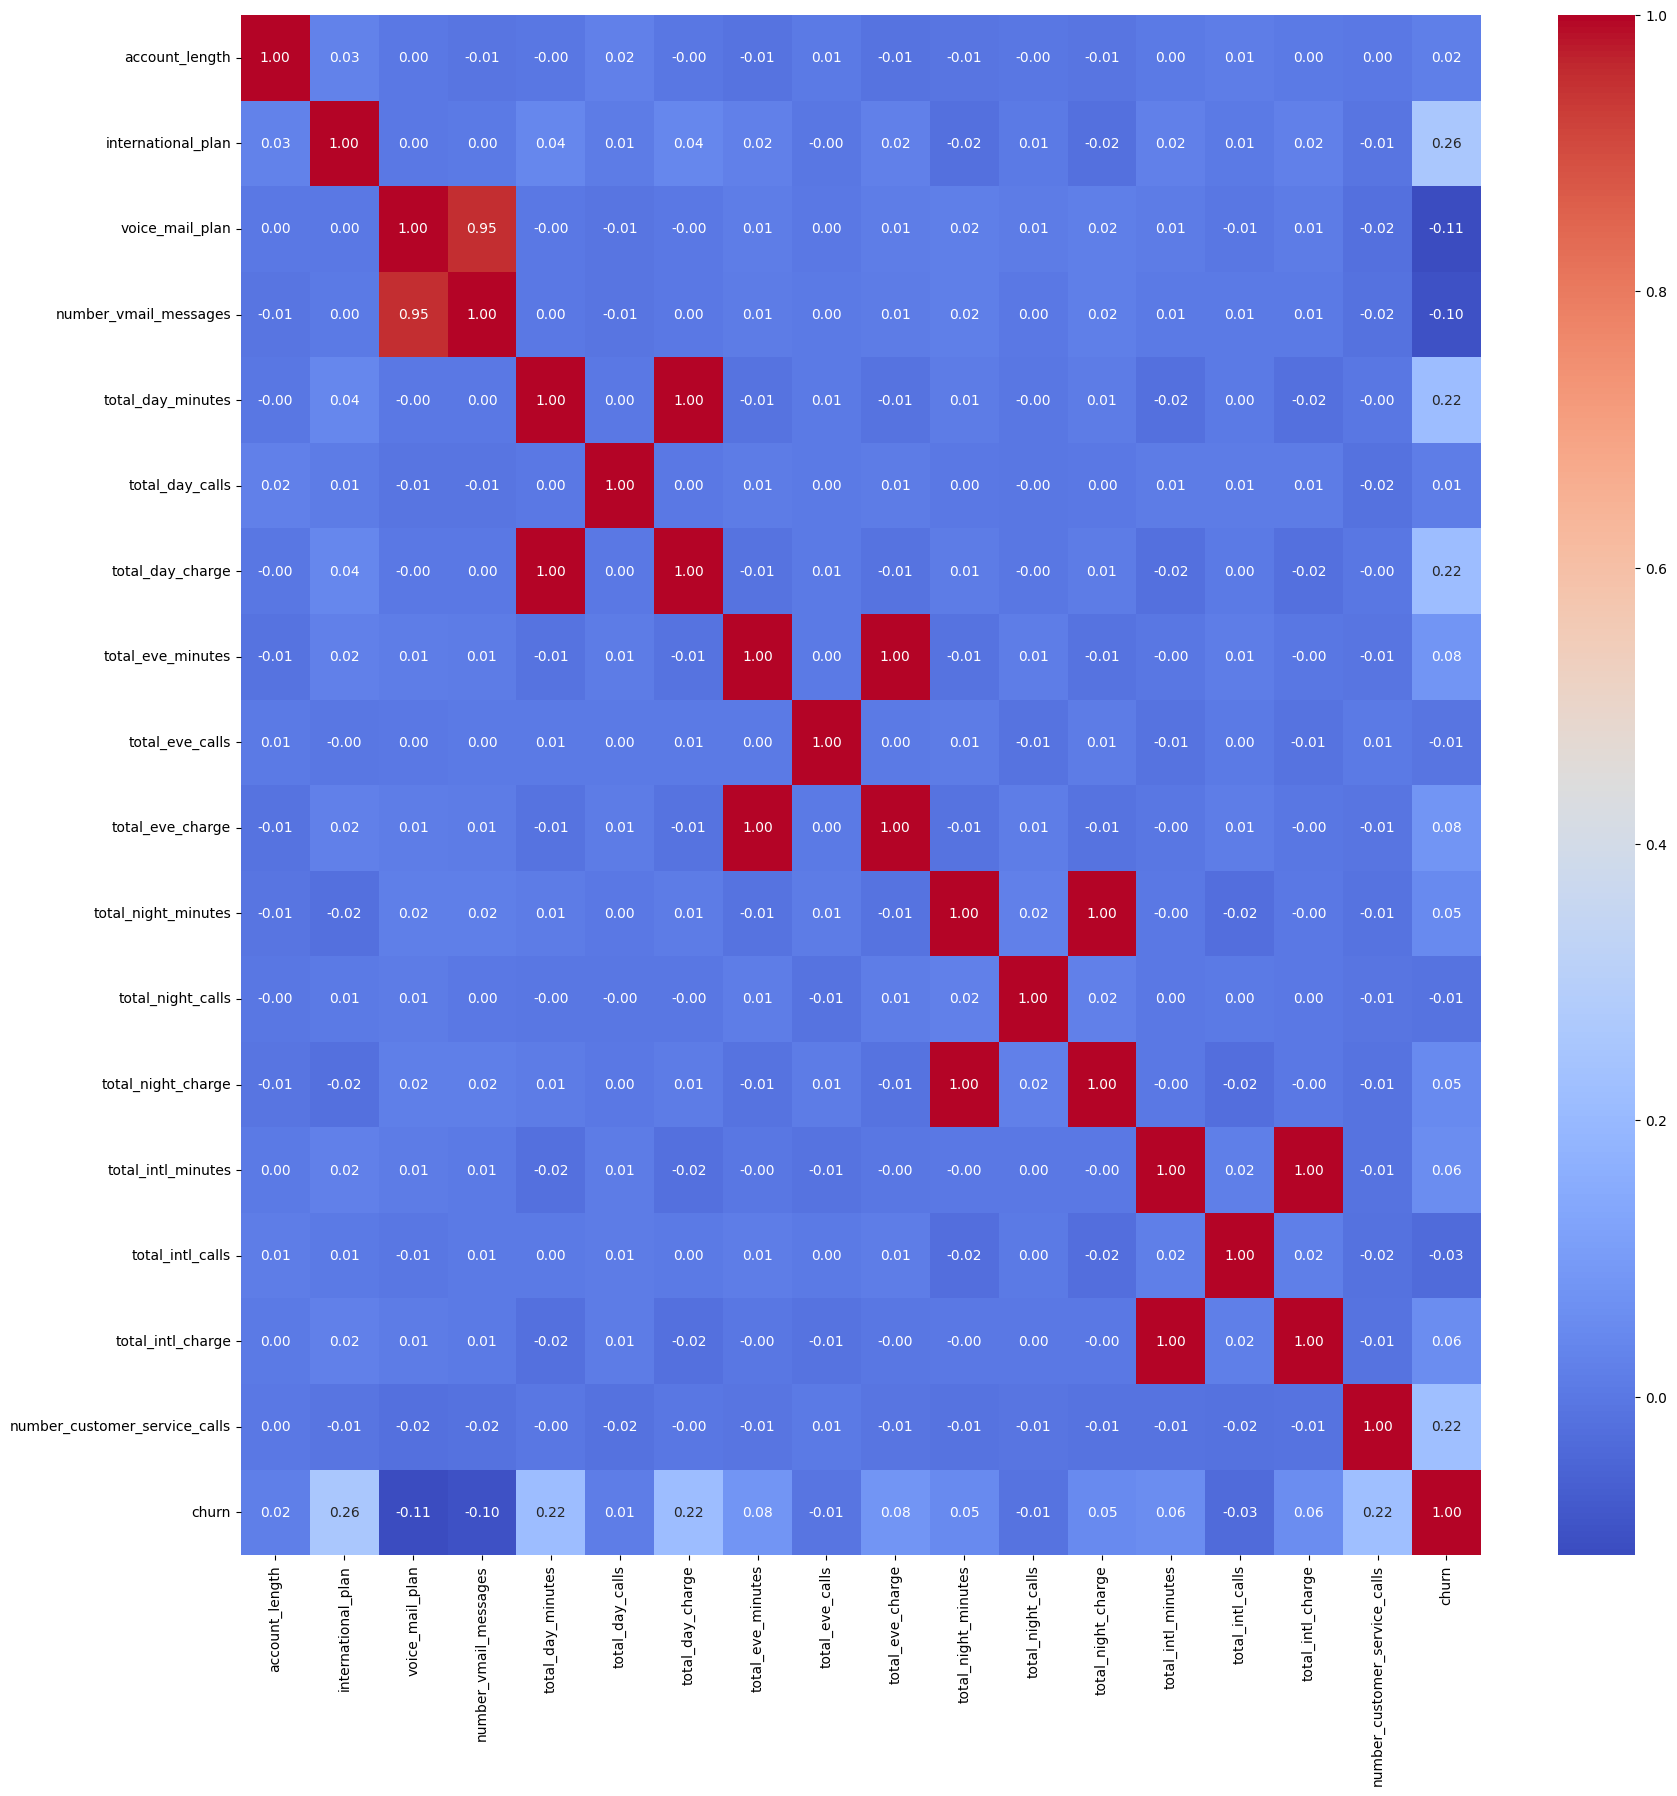

In [8]:
corr_df = df.corr(numeric_only=True)
plt.figure(figsize=(20, 20))
sns.heatmap(corr_df, fmt='.2f', annot=True,cmap='coolwarm')  # annot 박스 안에 수치 넣을지 
plt.show()

<Axes: xlabel='international_plan', ylabel='count'>

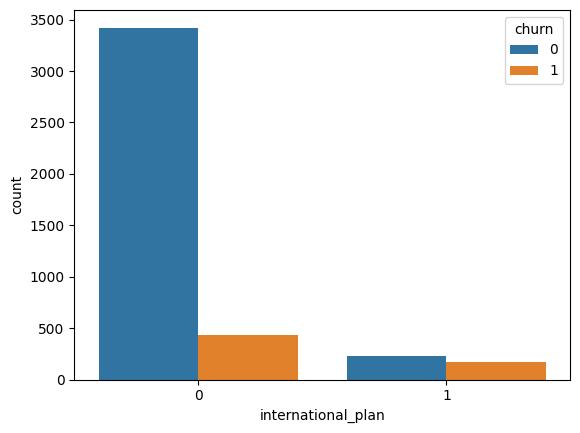

In [9]:
# 이탈률 확인
sns.countplot(
    data=df,
    x='international_plan',
    hue='churn'
)

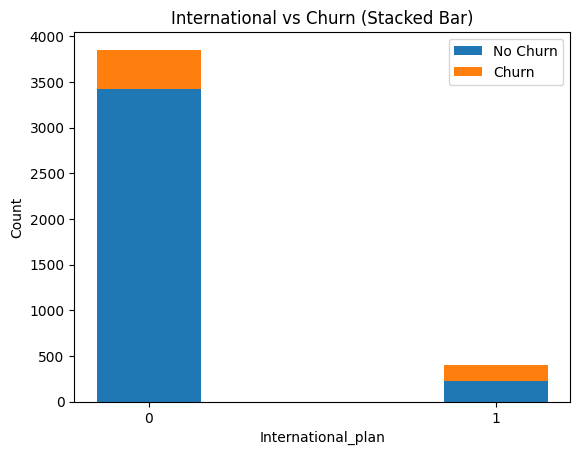

In [10]:
ct = pd.crosstab(df['international_plan'], df['churn'])
x = ct.index                 # international 값
churn_0 = ct[0].values       # churn = 0
churn_1 = ct[1].values       # churn = 1

plt.bar(x, churn_0, label='No Churn', width=0.3)
plt.bar(x, churn_1, bottom=churn_0, label='Churn', width=0.3)

plt.xlabel('International_plan')
plt.ylabel('Count')
plt.title('International vs Churn (Stacked Bar)')
plt.xticks([0, 1], [0, 1])
plt.legend()
plt.show()

<Axes: xlabel='number_customer_service_calls', ylabel='count'>

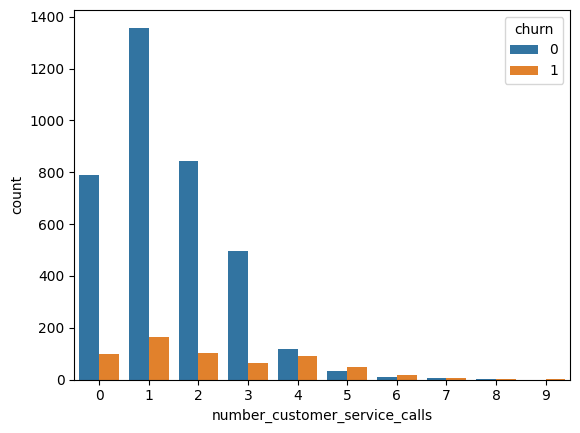

In [11]:
sns.countplot(
    data=df,
    x='number_customer_service_calls',
    hue='churn'
)

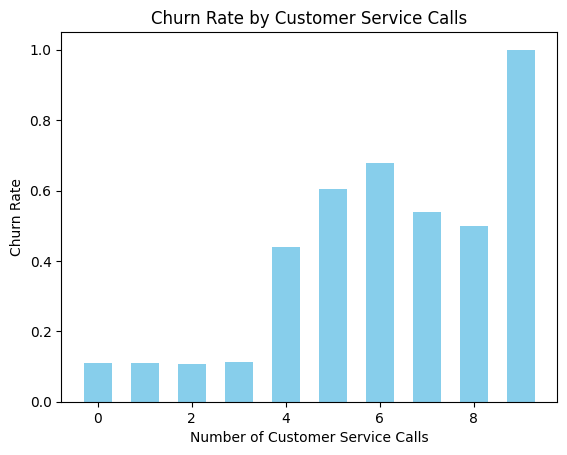

In [12]:
# 2. 📞 불만 전담 마크 (CS Care)
# number_customer_service_calls 별 이탈확률
# service_call이 높을수록 이탈확률이 길다
sample_df = df.groupby('number_customer_service_calls')['churn'].mean()


# plt.bar(sample_df.index, sample_df.values)
sample_df.values
x = sample_df.index         # 인덱스
y = sample_df.values        # 값

plt.bar(x, y, color='skyblue', width=0.6)
plt.xlabel('Number of Customer Service Calls')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Customer Service Calls')
plt.show()

C:\Users\Playdata\AppData\Local\Temp\ipykernel_5408\2966189160.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sample_df = df.groupby('intl_charge_group')['churn'].mean()


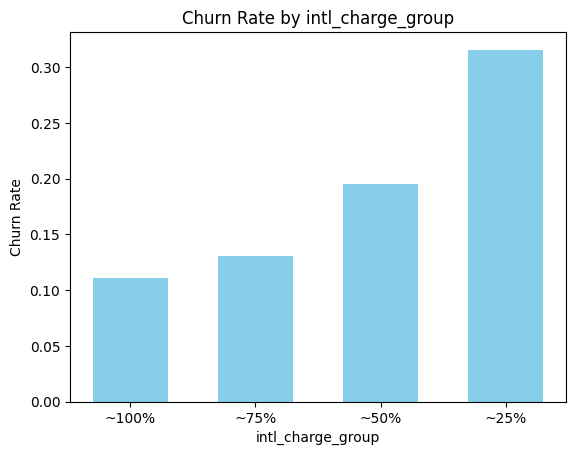

In [13]:
# 🌍 국제전화 요금제 제안:
df2 = df[df['international_plan'] == 0]
df2.head()

# pd.cut(): 구간별로 구분하는 함수 
df['intl_charge_group'] = pd.cut(
    df['total_intl_charge'],
    bins=[0, 1.5, 3.5, 4.5, 6],
    labels=['~100%', '~75%','~50%','~25%'],
    right=True, # 오른쪽 기준 값을 포함하지 않음 / True는 오른쪽 값을 포함함, 기본값임
)

# -------------------------------------------------------------
sample_df = df.groupby('intl_charge_group')['churn'].mean()


# plt.bar(sample_df.index, sample_df.values)
sample_df.values
x = sample_df.index         # 인덱스
y = sample_df.values        # 값

plt.bar(x, y, color='skyblue', width=0.6)
plt.xlabel('intl_charge_group')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by intl_charge_group')
plt.show()
# df2['total_intl_charge'].describe()

C:\Users\Playdata\AppData\Local\Temp\ipykernel_5408\1512177798.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sample_df = df.groupby('bill_group')['churn'].mean()


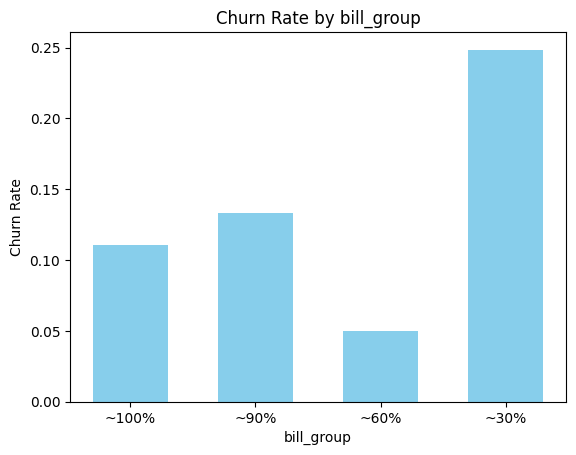

In [25]:
# 4. 💰 요금 할인 쿠폰 발송 (Price Sensitive)
        # 조건: 월 요금 상위 30% AND Risk Level >= Warning (Warning, Critical)
        # Warning은 Probability > 0.70 -> 0.75로 상향 조정

df['total_bill'] = (
        df['total_day_charge'] + 
        df['total_eve_charge'] + 
        df['total_night_charge'] + 
        df['total_intl_charge']
    )


# -----------------------------------------------------
df['bill_group'] = pd.cut(
    df['total_bill'],
    bins=[0, 46.52, 56.956, 64.823, 1000],
    labels=['~100%', '~90%','~60%','~30%'],
    right=True, # 오른쪽 기준 값을 포함하지 않음 / True는 오른쪽 값을 포함함, 기본값임
)

# -------------------------------------------------------------
sample_df = df.groupby('bill_group')['churn'].mean()


# plt.bar(sample_df.index, sample_df.values)
sample_df.values
x = sample_df.index         # 인덱스
y = sample_df.values        # 값

plt.bar(x, y, color='skyblue', width=0.6)
plt.xlabel('bill_group')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by bill_group')
plt.show()
# 64.823
#56.956
#46.52

In [50]:
df.describe()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,0.093176,0.261647,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059,0.140706
std,39.698401,0.290714,0.439583,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434,0.347759
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,0.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000,0.000000
50%,100.000000,0.000000,0.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,0.000000,1.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000,0.000000
max,243.000000,1.000000,1.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


C:\Users\Playdata\AppData\Local\Temp\ipykernel_18928\1204519254.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sample_df = df.groupby('day_group')['churn'].mean()


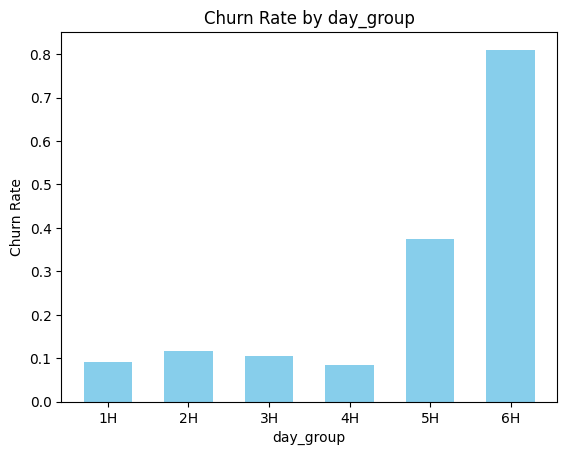

In [ ]:
# 주간 전화 시간별 시각화

# pd.cut(): 구간별로 구분하는 함수 
df['day_group'] = pd.cut(
    df['total_day_minutes'],
    bins=[0, 60, 120, 180, 240, 300, 360],
    labels=['1H','2H','3H','4H','5H','6H'],
    right=True, # 오른쪽 기준 값을 포함하지 않음 / True는 오른쪽 값을 포함함, 기본값임
)

# -------------------------------------------------------------
sample_df = df.groupby('day_group')['churn'].mean()


# plt.bar(sample_df.index, sample_df.values)
sample_df.values
x = sample_df.index         # 인덱스
y = sample_df.values        # 값

plt.bar(x, y, color='skyblue', width=0.6)
plt.xlabel('day_group')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by day_group')
plt.show()




In [ ]:
# 결과값 저장
# 더 좋은 모델 있을 시 다시 실행

test_pred = model.predict(X_real_df)
test_pred_proba = model.predict_proba(X_real_df)[:, 1]

test_pred[:10]
# test_pred_proba[:10]

result_df = X_real_df.copy()
result_df['churn_pred'] = test_pred
result_df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn_pred
0,KS,128,area_code_415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,AL,118,area_code_510,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
2,IA,62,area_code_415,0,0,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4,1
3,VT,93,area_code_510,0,0,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3,0
4,NE,174,area_code_415,0,0,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3,0


In [ ]:
result_df.groupby('churn_pred')['state'].count()

churn_pred
0    660
1     90
Name: state, dtype: int64

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


# 테스트할 하이퍼 파라미터 dict
param_grid = {
    'iterations': [500, 700, 1000]
    'learning_rate': [0.001, 0.01, 0.1]
}
# 파라미터별 교차 검증 
rnd_search = RandomizedSearchCV(kn_clf, param_grid, cv=5, scoring='f1_weighted')
rnd_search.fit(X_train, y_train)

# 결과 확인
# grid_search.cv_results_
print(rnd_search.best_params_)
print(rnd_search.best_score_)



model = CatBoostClassifier(
    iterations=500,   # 반복횟수
    learning_rate=0.01,
    eval_metric='Accuracy',
    verbose=100
)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (859918709.py, line 6)